(errors-s-m-notebook)=
# Crisi della replicabilità 

Nella pratica scientifica attuale, si verificano numerosi casi di frode a causa delle notevoli implicazioni economiche legate alla pubblicazione su prestigiose riviste scientifiche. Tuttavia, questo problema è spesso sottovalutato poiché le riviste esitano ad ammettere la necessità di correzioni o ritrattazioni degli articoli già pubblicati. Un evento significativo è avvenuto nel 2022 negli Stati Uniti, quando un biologo è stato arrestato e condannato a una pena detentiva per aver manipolato i dati di una sua pubblicazione scientifica.  Ancora più ironico è il caso di [Francesca Gino](https://www.npr.org/2023/06/26/1184289296/harvard-professor-dishonesty-francesca-gino), una rinomata docente presso la Harvard Business School, nota per le sue ricerche sulla disonestà e il comportamento non etico, che è stata accusata di aver presentato lavori contenenti risultati falsificati. Ulteriore scalpore è stato causato dalle [dimissioni del rettore di Standford](https://www.science.org/content/article/stanford-president-to-step-down-despite-probe-exonerating-him-of-research-misconduct), un rinomato neuroscienziato, a seguito dell'indagine condotta da Theo Baker, uno studente diciassettenne di Stanford, sulle presunte violazioni etiche della ricerca commesse da Tessier-Lavigne. Il New York Times ha affrontato questa vicenda con l'articolo [The Research Scandal at Stanford Is More Common Than You Think](https://www.nytimes.com/2023/07/30/opinion/stanford-president-student-journalist.html).

La frode rappresenta un evidente problema che mina la riproducibilità dei risultati delle pubblicazioni scientifiche, il fondamento stesso del metodo scientifico. Questo fenomeno è stato descritto come "crisi della riproducibilità dei risultati della ricerca" negli ultimi decenni. Tuttavia, la difficoltà di replicare i risultati pubblicati non è solo dovuta alla frode, ma è spesso causata dall'adozione di "pratiche di ricerca discutibili".

Le "questionable research practices" (pratiche di ricerca discutibili) si riferiscono a un insieme di comportamenti o azioni adottate dai ricercatori durante il processo di conduzione e comunicazione della ricerca scientifica, che possono compromettere l'integrità e l'affidabilità dei risultati ottenuti. Queste pratiche includono il "P-hacking", in cui i ricercatori manipolano i dati o le analisi statistiche per ottenere risultati significativi; il "HARKing" (Hypothesizing After Results are Known), in cui le ipotesi vengono formulate retrospettivamente per adattarsi ai risultati ottenuti; e la "selettiva presentazione dei risultati", dove vengono presentati solo i risultati che supportano le ipotesi, tralasciando quelli non significativi o contraddittori.

Due casi molto famosi in psicologia riguardano gli studi di John Bargh sul "camminare degli anziani", ampiamente citati e insegnati nei corsi universitari, ma non replicati in studi successivi. Inoltre, gli esperimenti sulla percezione extrasensoriale condotti da Daryl Bem hanno fornito presunte prove per il controverso fenomeno, ma sono stati pesantemente criticati per la metodologia e i dati non hanno confermato l'esistenza della percezione extrasensoriale.

Va notato che la crisi della riproducibilità dei risultati della ricerca può essere, in parte, attribuita alla frode e/o alle "pratiche di ricerca discutibili", ma, d'altra parte, è anche una componente intrinseca del processo scientifico stesso, in cui vecchie idee o risultati che non resistono a un'attenta analisi vengono eliminati, anche se questo processo di selezione non è sempre efficace. Un punto cruciale per la presente discussione riguarda il fatto che, in psicologia, per molti decenni, questo processo di selezione si è basato principalmente sull'uso di un metodo statistico, l'approccio frequentista del test di ipotesi nulla e della significatività statistica. Si è ritenuto che i risultati che non raggiungono la "significatività statistica" debbano essere scartati, mentre quelli che la superano possono essere considerati credibili, basandosi esclusivamente sulla loro significatività statistica.

Tuttavia, l'idea che la significatività statistica sia un filtro in grado di distinguere i "buoni" risultati di ricerca dai "cattivi" è fondamentalmente sbagliata. Numerose evidenze dimostrano questa fallacia. Per comprendere questo aspetto, esamineremo uno studio di {cite:t}`loken2017measurement`, che mette in evidenza la relazione tra la crisi della replicabilità e la procedura di decisione statistica dell'approccio frequentista. Uno dei principali problemi sottolineati dallo studio è che in contesti di ricerca complessi, la significatività statistica fornisce prove molto deboli riguardo al segno o all'entità di eventuali effetti sottostanti. In altre parole, il raggiungimento della significatività statistica non garantisce la rilevanza o la consistenza dei risultati.

## Errori di tipo *M* e *S* 

Per evidenziare le implicazioni del processo decisionale basato sulla significatività statistica, gli autori di {cite:t}`loken2017measurement` hanno condotto una simulazione. In questa simulazione, hanno immaginato una ricerca ipotetica in cui un effetto reale, seppur molto debole, era presente, ma difficilmente individuabile senza una grande quantità di dati. I ricercatori hanno quindi cercato di rilevare questo effetto utilizzando l'approccio frequentista e valutando la significatività statistica.

I risultati della simulazione hanno rivelato che, anche quando un effetto reale ma debole era presente, l'approccio frequentista tendeva a individuare un effetto significativo solo in una piccola percentuale dei casi. Inoltre, quando veniva individuato un effetto significativo, la sua stima di grandezza risultava molto imprecisa e instabile.

In altre parole, la significatività statistica fornisce solo un'indicazione generale sulla presenza o assenza di un effetto, ma non offre informazioni precise sulla sua dimensione o replicabilità. Questo problema diventa ancora più evidente quando si considera che molte ricerche in psicologia e scienze sociali utilizzano campioni relativamente piccoli, e gli effetti osservati in tali studi tendono ad essere molto modesti. In tali contesti, l'approccio frequentista rischia di fornire prove molto deboli e instabili riguardo alla presenza o assenza di un effetto, mettendo a rischio la replicabilità e l'affidabilità dei risultati della ricerca.

Riproduciamo qui, in maniera semplificata, la simulazione condotta da {cite:t}`loken2017measurement`.
Iniziamo ad importare le librerie necessarie.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina'

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

from aquarel import load_theme
theme = load_theme("minimal_light")
theme.apply()
import matplotlib.style as style 
style.use("tableau-colorblind10")

Supponiamo di considerare due campioni casuali indipendenti di dimensioni \(n_1 = 20\) e \(n_2 = 25\), estratti dalle distribuzioni normali \(\mathcal{N}(102, 10)\) e \(\mathcal{N}(100, 10)\) rispettivamente. La dimensione effettiva dell'effetto per la differenza tra le medie di questi due campioni è rappresentata da \(d\), calcolato attraverso la formula:

$$
d = \frac{\bar{y}_1 - \bar{y}_2}{s_p},
$$

dove \(\bar{y}_1\) e \(\bar{y}_2\) sono le medie campionarie dei due gruppi, mentre \(s_p\) è la deviazione standard combinata definita come:

$$
s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}},
$$

con \(s_1\) e \(s_2\) rappresentanti le deviazioni standard campionarie dei due gruppi.

Nel caso specifico preso in esame, la dimensione effettiva dell'effetto è molto piccola, indicando che la differenza osservata tra le medie manca di significatività pratica. Questo suggerisce che la distinzione tra i due gruppi non ha un impatto sostanziale nella pratica.

In [13]:
mu_1 = 102
mu_2 = 100
sigma = 10
n1 = 20
n2 = 25

In [14]:
mean_difference = abs(mu_1 - mu_2)
pooled_sd = np.sqrt(((n1 - 1) * sigma**2 + (n2 - 1) * sigma**2) / (n1 + n2 - 2))
cohen_d = mean_difference / pooled_sd

print("Cohen's d effect size:", cohen_d)

Cohen's d effect size: 0.2


Esaminiamo ora quali sarebbero le conclusioni derivanti dall'approccio frequentista mediante la procedura di decisione statistica in queste circostanze. Consideriamo una simulazione in cui vengono estratti due campioni: uno composto da 20 osservazioni dalla prima popolazione e l'altro da 25 osservazioni dalla seconda popolazione. Successivamente, viene eseguito il test $t$ di Student.

Nell'approccio frequentista, se il valore-$p$ risulta essere superiore a 0.05, i risultati vengono considerati non significativi e quindi scartati. Al contrario, se il valore-$p$ è inferiore a 0.05, il risultato è considerato "pubblicabile" e si conclude che esiste una differenza significativa tra i due gruppi.

Per comprendere appieno le conclusioni ottenute mediante la procedura frequentista in questa situazione, è necessario ripetere il processo sopra descritto per un ampio numero di iterazioni, ad esempio 50,000 volte. Questo implica che il processo di estrazione dei campioni e il calcolo dei valori-$p$ vengono ripetuti numerose volte al fine di ottenere una visione completa delle possibili distribuzioni dei risultati.

In [4]:
n_samples = 50000

res = []

for i in range(n_samples):
    # Get random samples 
    y1 = np.random.normal(loc=mu_1, scale=sigma, size=n1)
    y2 = np.random.normal(loc=mu_2, scale=sigma, size=n2)
    # Compute effect size
    y1bar = y1.mean()
    y2bar = y2.mean()
    v1 = np.var(y1, ddof=1)
    v2 = np.var(y2, ddof=1)
    s = np.sqrt(((n1-1)*v1 + (n2-1)*v2) / (n1 + n2 - 2))
    efsize = (y1bar - y2bar) / s
    # Compute p-value
    out = stats.ttest_ind(a=y1, b=y2, equal_var=True)
    # Save effect size only for 'statistically significant' results
    if out.pvalue < 0.05:
        res.append(efsize)


Esaminiamo un istogramma dei casi nei quali il valore-$p$ è stato < 0.05.

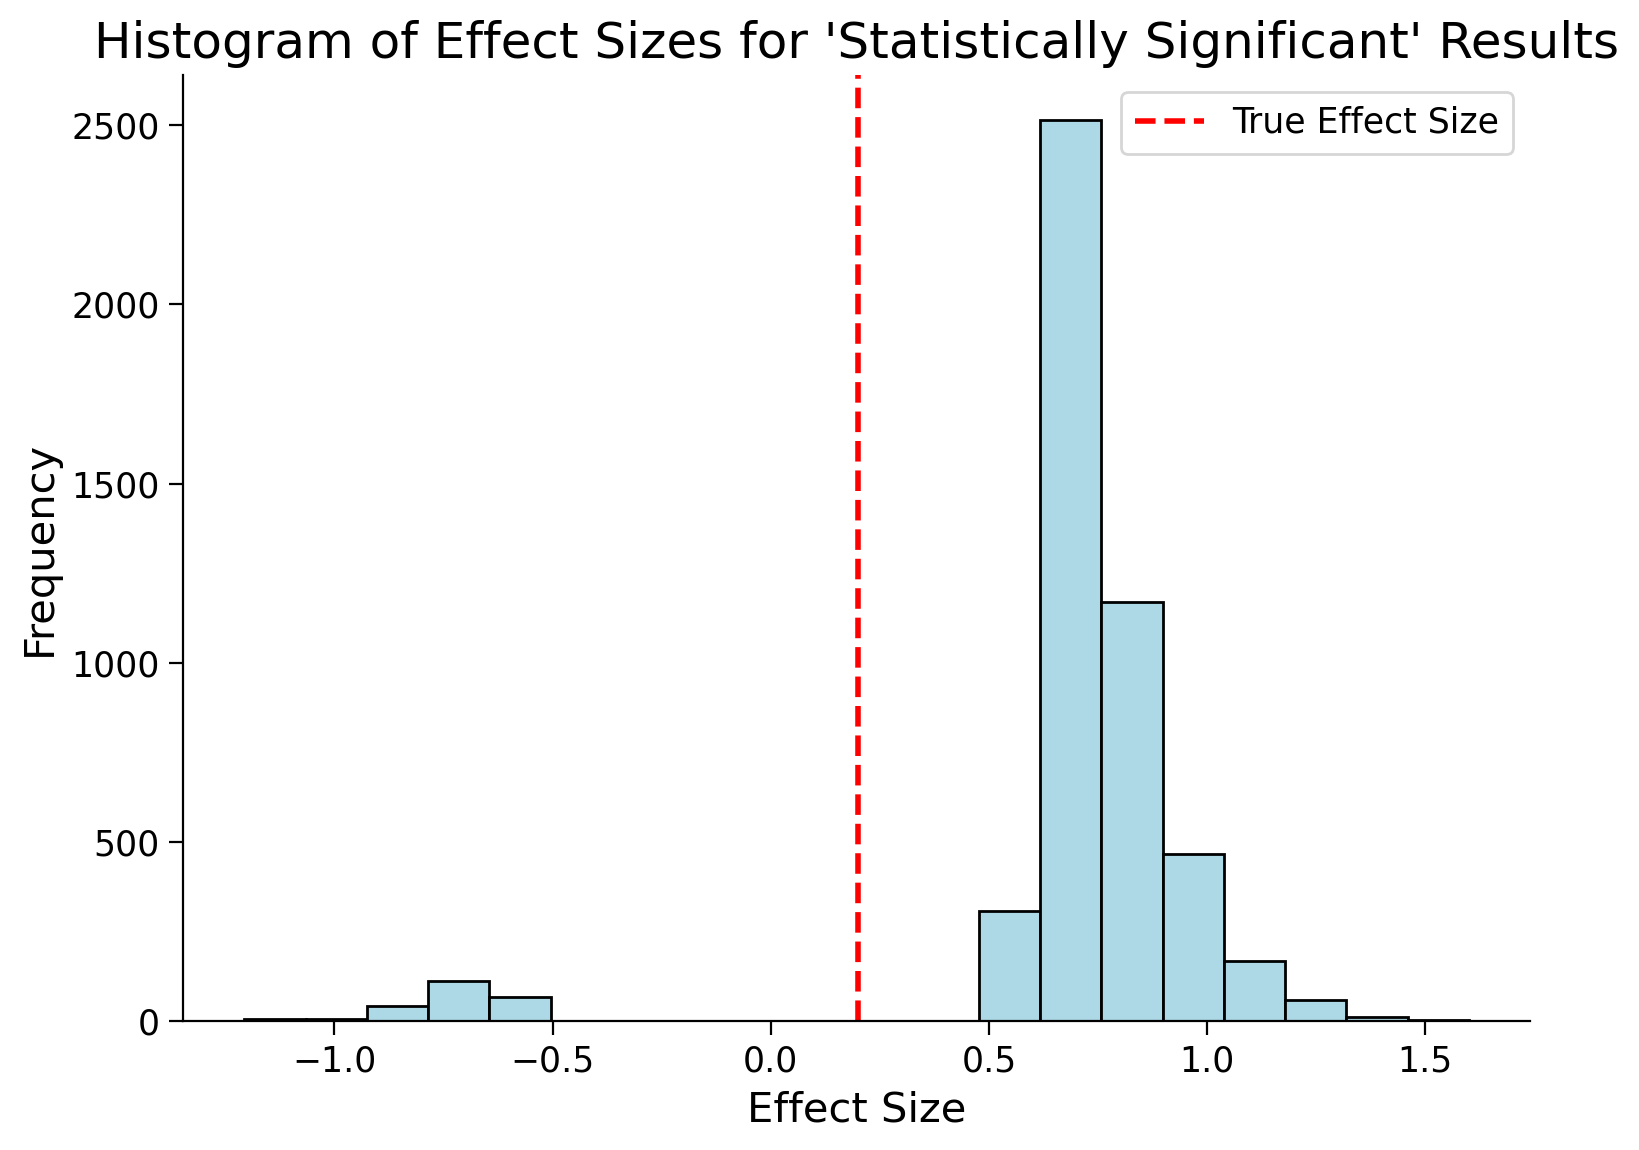

In [12]:
plt.hist(res, bins=20, color="lightblue", edgecolor="black")
plt.axvline(
    x=0.2, color="red", linestyle="dashed", linewidth=2, label="True Effect Size"
)
plt.xlabel("Effect Size")
plt.ylabel("Frequency")
plt.title("Histogram of Effect Sizes for 'Statistically Significant' Results")
plt.legend()
plt.show()

Come sottolineato da {cite:t}`loken2017measurement`, l'utilizzo dell'approccio frequentista nella procedura di decisione statistica può portare a due tipi di errori significativi. Il primo errore, noto come "magnitude", si manifesta nel fatto che i risultati pubblicati tendono a sovrastimare la vera grandezza dell'effetto. Nella simulazione effettuata, sebbene la vera grandezza dell'effetto fosse modesta (0.2), la media della grandezza dell'effetto per i risultati dichiarati "statisticamente significativi" era di circa 0.8, indicando una grandezza dell'effetto "ampia".

Il secondo errore, denominato "segno", si verifica in alcune situazioni in cui, a causa della variabilità campionaria, viene commesso un errore nella direzione dell'effetto. In tali circostanze, il ricercatore potrebbe erroneamente concludere che $\mu_2 > \mu_1$, quando in realtà non è così. È importante notare che, anche in questi casi, la grandezza dell'effetto viene sovrastimata in termini assoluti.

È interessante notare che le stesse conclusioni si applicherebbero anche se avessimo considerato l'intervallo di confidenza per la differenza tra le medie. In sintesi, l'approccio frequentista introduce un errore sistematico nella stima della grandezza dell'effetto, che è la quantità più importante che il ricercatore deve stimare. In alcune situazioni, può persino causare errori nella stima della direzione dell'effetto.

## Considerazioni conclusive

In conclusione, come evidenziato da {cite:t}`loken2017measurement`, l'approccio frequentista non sembra rappresentare un metodo affidabile per valutare i risultati della ricerca e determinare la loro attendibilità o la necessità di scartarli. Questa mancanza di affidabilità deriva dall'introduzione di errori sistematici nella stima dell'effetto, che può anche portare a errori nella direzione dell'effetto in alcune circostanze. Di conseguenza, non sembra esserci motivo valido per continuare a impiegare questo approccio.

Al contrario, l'adozione dell'approccio bayesiano potrebbe offrire risultati più precisi e affidabili nella valutazione dei dati di ricerca. Tale approccio considera la probabilità delle ipotesi alla luce dei dati osservati, evitando gli errori intrinseci dell'approccio frequentista e fornendo una base più solida per le decisioni sulla validità dei risultati.

## Watermark

In [15]:
%load_ext watermark
%watermark -n -u -v -iv -w 

Last updated: Sun Aug 13 2023

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

scipy     : 1.11.1
numpy     : 1.25.2
matplotlib: 3.7.1

Watermark: 2.4.3

